In [44]:
from scipy.io import arff
import pandas as pd
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn import metrics 
from sklearn.tree import _tree
import matplotlib.pyplot as plt
import dataframe_image as dfi

## Importando o Dataset

In [66]:
data = arff.loadarff('beans.arff')
df = pd.DataFrame(data[0])
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395.0,610.291,208.178117,173.888747,1.197191,0.549812,28715.0,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,b'SEKER'
1,28734.0,638.018,200.524796,182.734419,1.097356,0.411785,29172.0,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,b'SEKER'
2,29380.0,624.110,212.826130,175.931143,1.209713,0.562727,29690.0,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,b'SEKER'
3,30008.0,645.884,210.557999,182.516516,1.153638,0.498616,30724.0,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,b'SEKER'
4,30140.0,620.134,201.847882,190.279279,1.060798,0.333680,30417.0,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,b'SEKER'


## Obtendo Estatísticas

In [64]:
df_0_10 = df.iloc[0:: , 0:10].describe()
dfi.export(df_0_10, "questão1-estatisticas.png")


In [65]:
df_11_16 = df.iloc[0:: , 10:17].describe()
dfi.export(df_11_16, "questão1-estatisticas2.png")

## Verificando Valores Nulos

In [51]:
# Count total NaN at each column in a DataFrame
print(" \nCount total NaN at each column in a DataFrame : \n\n",
      df.isnull().sum())

 
Count total NaN at each column in a DataFrame : 

 Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64


In [52]:
seeker   = df[df.Class.eq(b"SEKER")]
barbunya = df[df.Class.eq(b"BARBUNYA")]
bombay   = df[df.Class.eq(b"BOMBAY")]
cali     = df[df.Class.eq(b"CALI")]
horoz    = df[df.Class.eq(b"HOROZ")]
sira     = df[df.Class.eq(b"SIRA")]
dermason = df[df.Class.eq(b"DERMASON")]

## Divisão Entre Base de Treinamento e Testes

In [57]:
train = df.sample(frac=0.7, random_state=100) 
test  = df.drop(train.index)

In [58]:
train["Class"].value_counts()

b'DERMASON'    2484
b'SIRA'        1845
b'SEKER'       1438
b'HOROZ'       1373
b'CALI'        1112
b'BARBUNYA'     903
b'BOMBAY'       373
Name: Class, dtype: int64

In [59]:
test["Class"].value_counts()

b'DERMASON'    1062
b'SIRA'         791
b'SEKER'        589
b'HOROZ'        555
b'CALI'         518
b'BARBUNYA'     419
b'BOMBAY'       149
Name: Class, dtype: int64

In [60]:
train_X = train.iloc[0:: , 0:16].copy()
train_y = train.iloc[0:: , 16:17].copy()
fixed_train_y = train_y["Class"].str.decode('utf-8')




test_X = test.iloc[0:: , 0:16].copy()
test_y = test.iloc[0:: , 16:17].copy()
fixed_test_y = test_y["Class"].str.decode('utf-8')

## Executando o Experimento Variando a Profundidade da Árvore

In [69]:
accuracy_test = []
accuracy_train = []

depth = []


for i in range(2, 50, 1):

    clf = tree.DecisionTreeClassifier( max_depth= i)
    clf = clf.fit(train_X.values, fix_train_y)


    y_predicted_test = clf.predict(test_X.values)
    y_predicted_train = clf.predict(train_X.values)
    
    
    accuracy_test.append(metrics.accuracy_score(fixed_test_y, y_predicted_test))
    
    accuracy_train.append(metrics.accuracy_score(fixed_train_y, y_predicted_train))

    depth.append(i)



## Plotando Gráficos: Erro x Profundidade e Acurácia x Profundidade

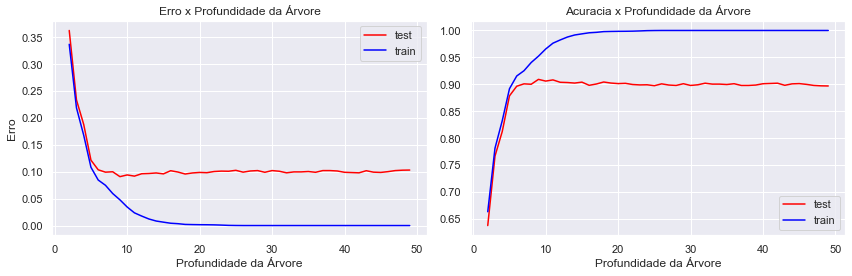

In [99]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

axes[0].plot(depth, [1 - x for x in accuracy_test ], color='red', label="test")
axes[0].plot(depth, [1 - x for x in accuracy_train ], color='blue', label="train")

axes[1].plot(depth, accuracy_test, color='red', label="test")
axes[1].plot(depth, accuracy_train, color='blue', label="train")


axes[0].legend()
axes[1].legend()

axes[0].title.set_text('Erro x Profundidade da Árvore')
axes[1].title.set_text('Acuracia x Profundidade da Árvore')

axes[0].set_ylabel('Erro')
axes[0].set_xlabel('Profundidade da Árvore')

axes[1].set_label('Acurácia')
axes[1].set_xlabel('Profundidade da Árvore')

fig.tight_layout()


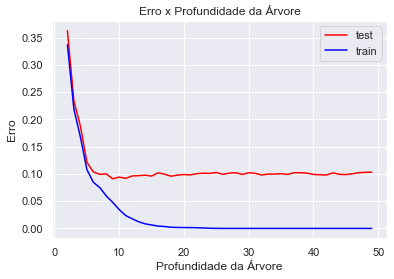

In [70]:
plt.plot(depth, [1 - x for x in accuracy_test ], color='red', label="test")
plt.plot(depth, [1 - x for x in accuracy_train ], color='blue', label="train")
plt.title('Erro x Profundidade da Árvore')
plt.xlabel('Profundidade da Árvore')
plt.ylabel('Erro')
plt.legend()
plt.show()

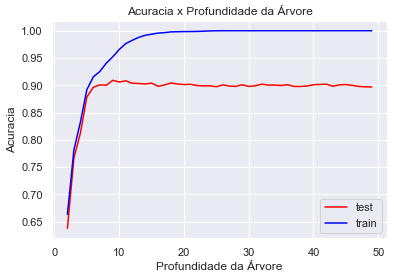

In [71]:
plt.plot(depth, accuracy_test, color='red', label="test")
plt.plot(depth, accuracy_train, color='blue', label="train")
plt.title('Acuracia x Profundidade da Árvore')
plt.xlabel('Profundidade da Árvore')
plt.ylabel('Acuracia')
plt.legend()
plt.show()